# Data Acquisition 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import sklearn.datasets

In [3]:
boston = sklearn.datasets.load_boston()

# Plot MEDV against different variables

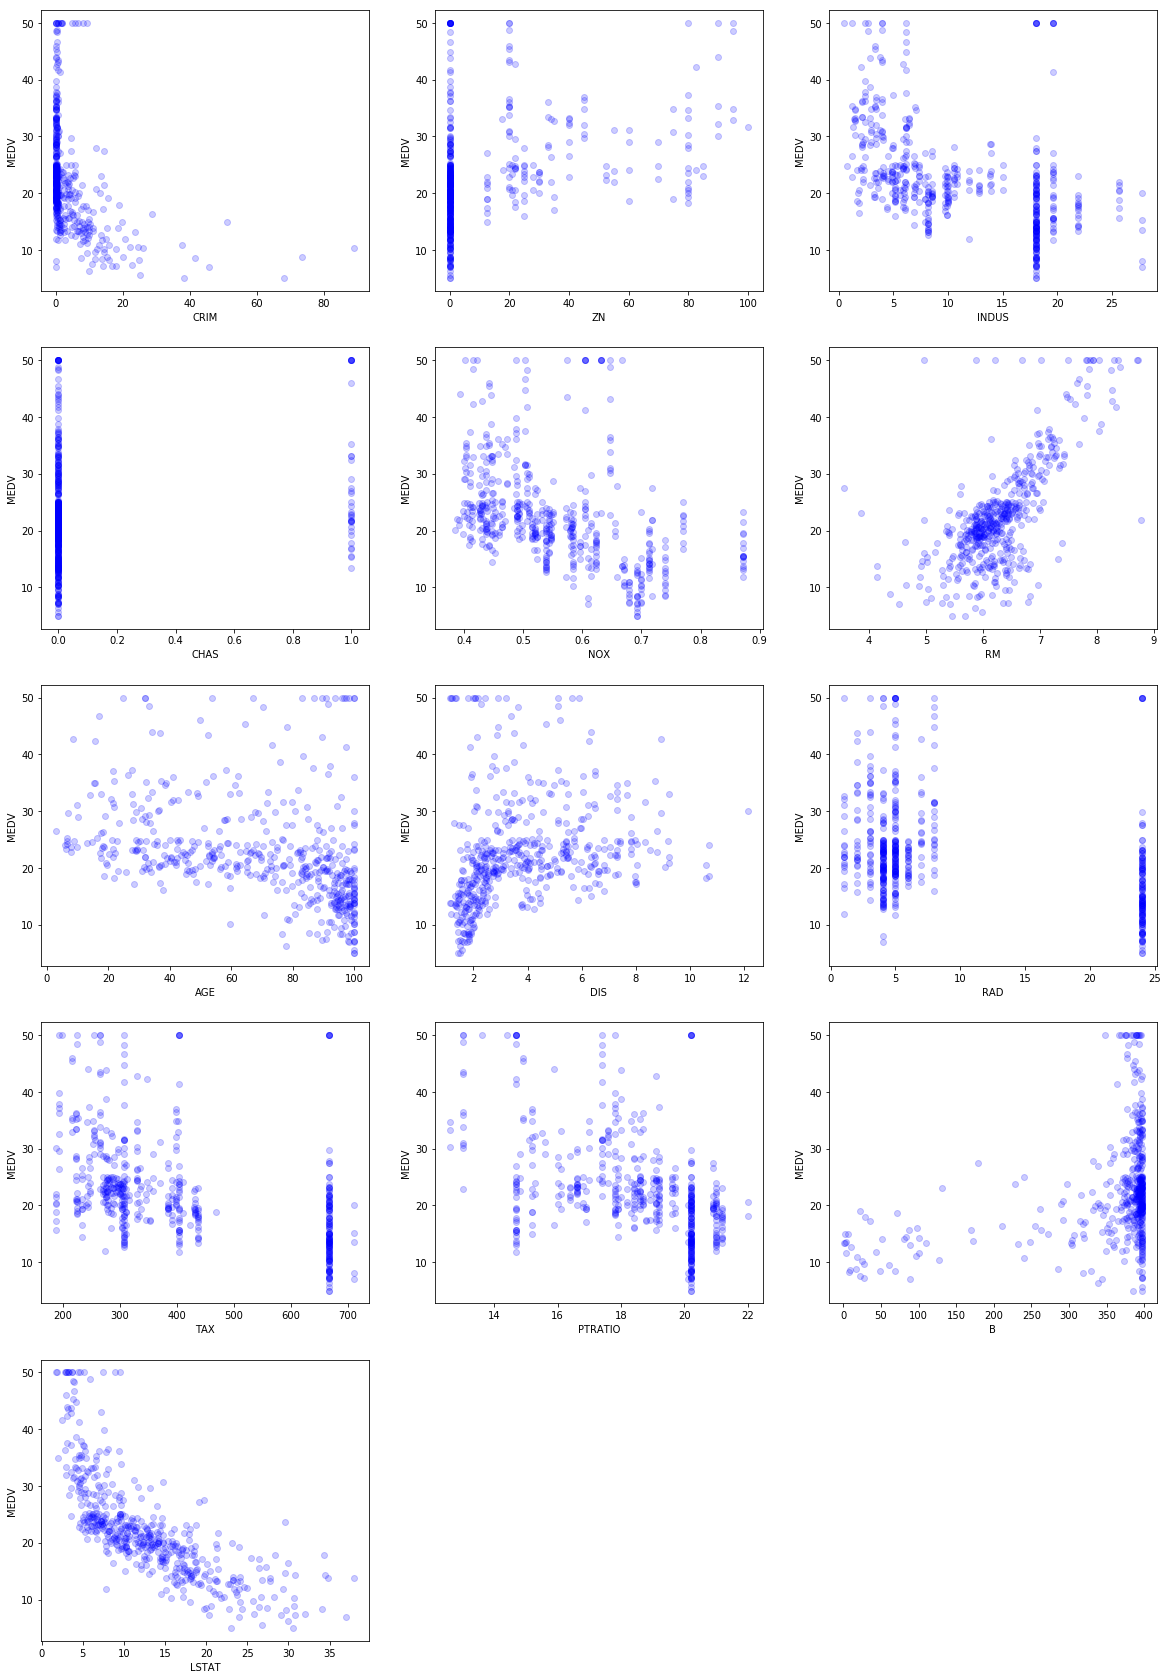

In [4]:
c = (int(np.ceil(boston.data.shape[1] / 3.0)), 3)

plt.figure(1, figsize=(20, 30))

for i in range(0, boston.data.shape[1]):
    plt.subplot2grid(c, (int(np.floor(i / 3.0)), i % 3))
    plt.scatter(boston.data[:, i], boston.target, marker='o', c='b', alpha=0.2)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('MEDV')

plt.show()

# Statistical Properties of the Data

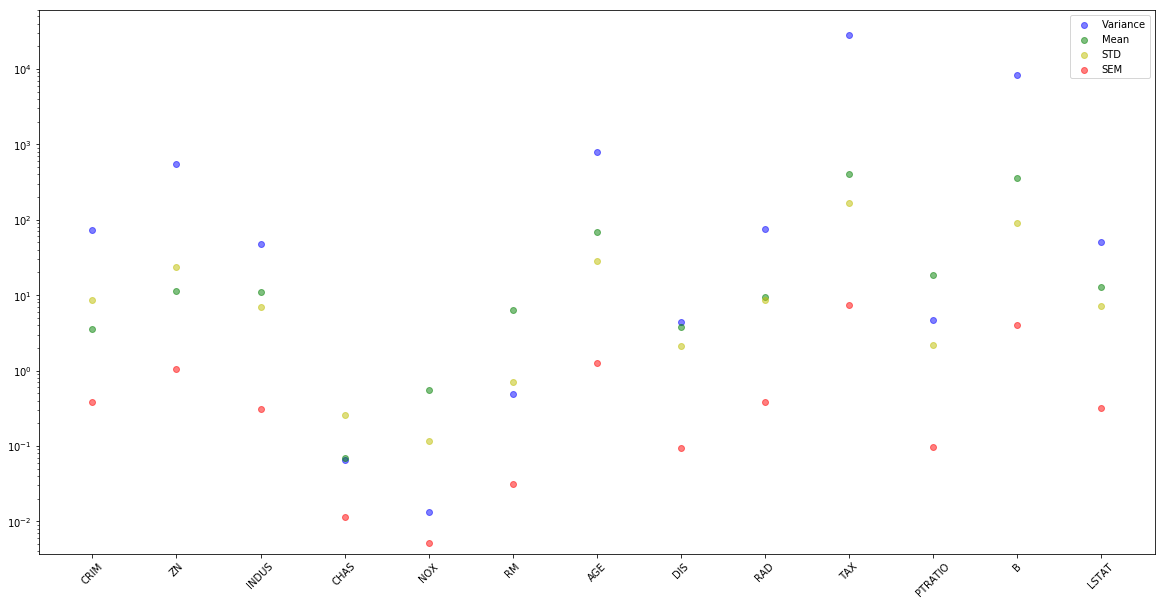

In [5]:
plt.figure(2, figsize=(20, 10))

x = np.arange(0, boston.data.shape[1])

plt.scatter(x, boston.data.T.var(axis=1), marker='o', c='b', alpha=0.5, label='Variance')
plt.scatter(x, boston.data.T.mean(axis=1), marker='o', c='g', alpha=0.5, label='Mean')
plt.scatter(x, boston.data.T.std(axis=1), marker='o', c='y', alpha=0.5, label='STD')
plt.scatter(x, sc.stats.sem(boston.data.T, axis=1), marker='o', c='r', alpha=0.5, label='SEM')

plt.gca().set_yscale('log')
plt.xticks(x, boston.feature_names, rotation=45)
plt.legend()
plt.show()

# Simple Linear Regression
In this block, the graphs are drawn again, but with the simple linear regression line added. Also, the coefficient of determination R<sup>2</sup> and the p-values are calculated and displayed.

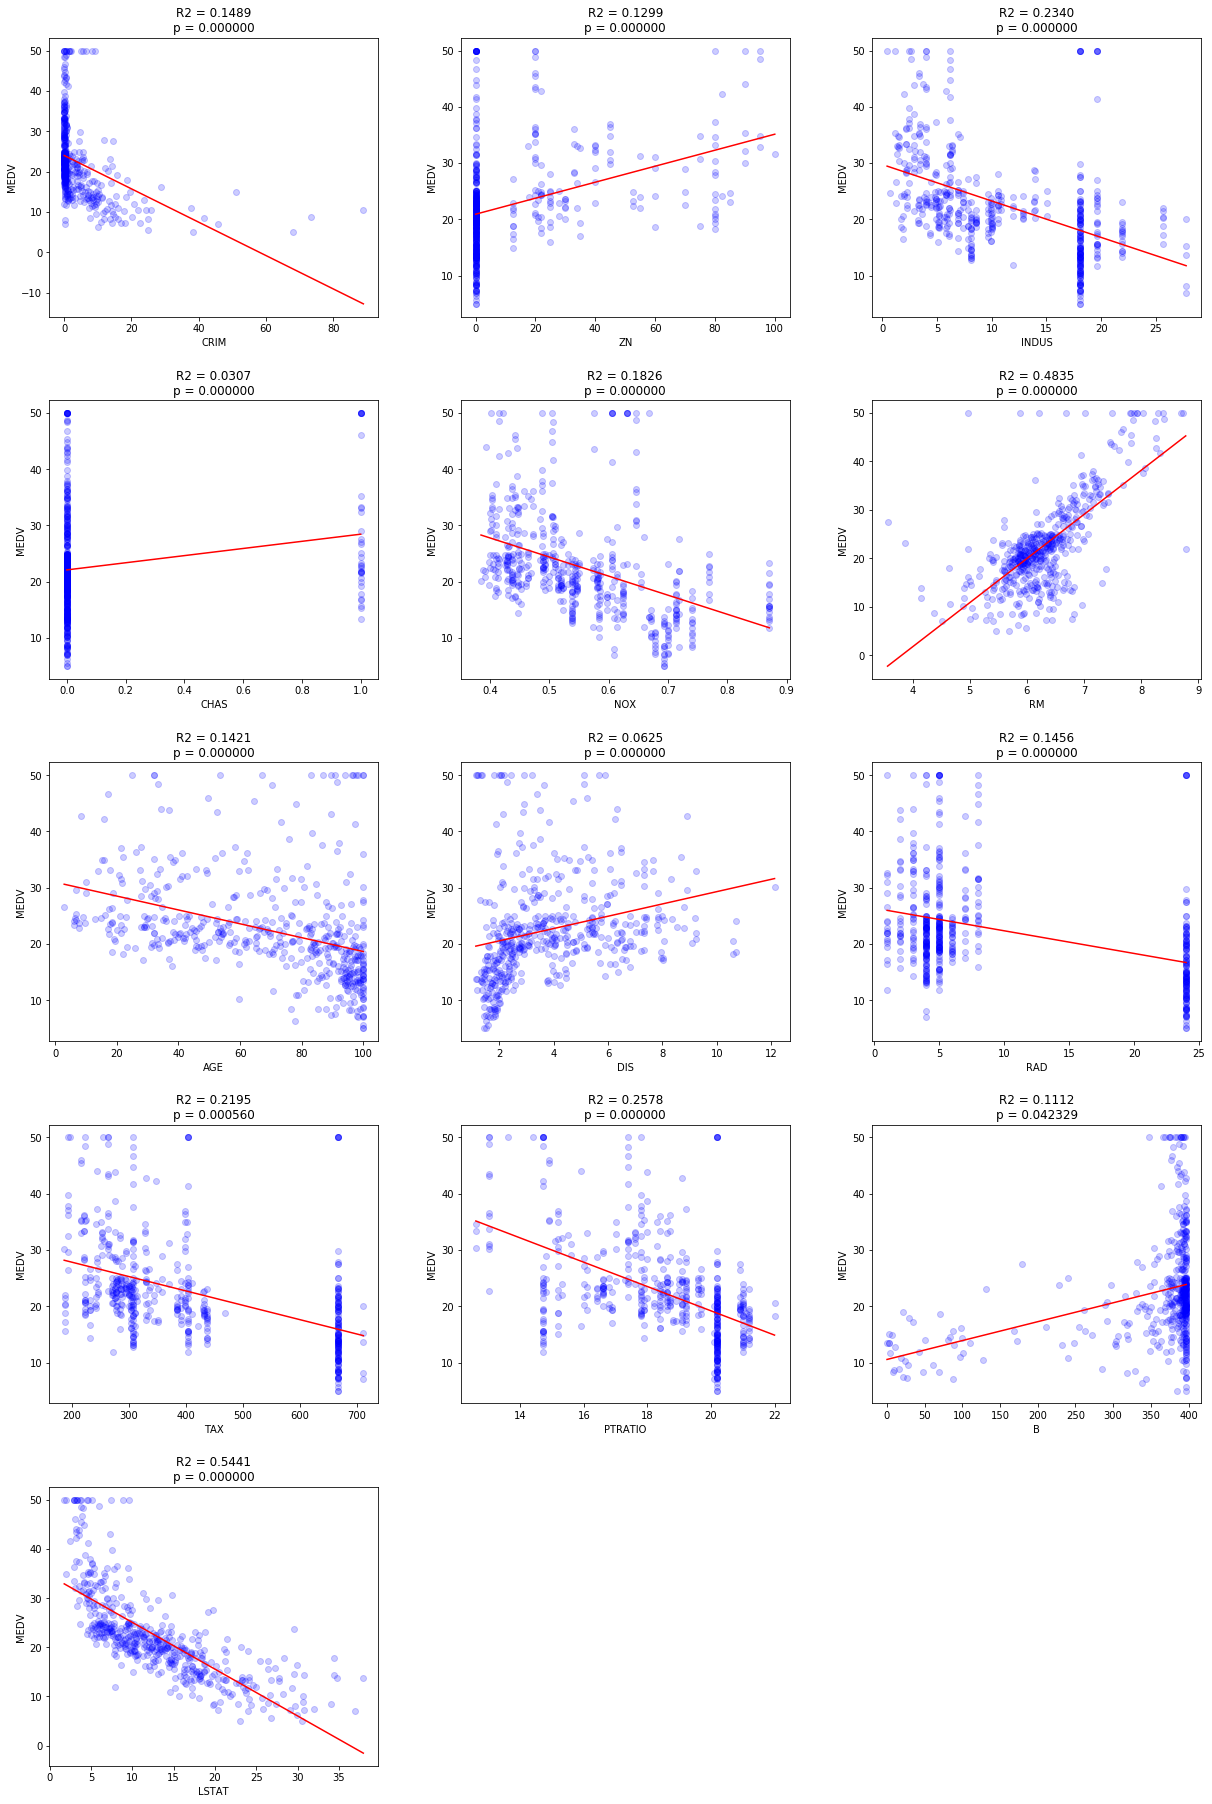

In [14]:
c = (int(np.ceil(boston.data.shape[1] / 3.0)), 3)

plt.figure(1, figsize=(20, 30))

boTargetMean = boston.target.mean()
boTargetMinusMean = boston.target - boTargetMean
SQ_Loss = []
for i in range(0, boston.data.shape[1]):
    plt.subplot2grid(c, (int(np.floor(i / 3.0)), i % 3))
    plt.scatter(boston.data[:, i], boston.target, marker='o', c='b', alpha=0.2)
    
    boDataMean = boston.data[:, i].mean()
    boDataMinusMean = boston.data[:, i] - boDataMean
    
    b1 = boDataMinusMean.dot(boTargetMinusMean) / boDataMinusMean.dot(boDataMinusMean)
    b0 = boTargetMean - b1 * boDataMean
    
    targetHat = b1 * boston.data[:, i] + b0
    targetMinusTargetHat = boston.target - targetHat
    
    targetHatMean = targetHat.mean()
    targetHatMinusTargetHatMean = targetHat - targetHatMean
    
    RSS = (targetMinusTargetHat ** 2).sum()
    SQ_Loss.append(RSS)
    R2 = 1. - RSS / (boTargetMinusMean ** 2).sum()
    SE = RSS / (targetHatMinusTargetHatMean ** 2).sum() / (boston.data.shape[0] - 2)
    t = b1 / SE
    p = sc.stats.norm.pdf(t, loc=0, scale=1)
    
    plt.plot(
        [boston.data[:, i].min(), boston.data[:, i].max()],
        [b1 * boston.data[:, i].min() + b0, b1 * boston.data[:, i].max() + b0],
        'r-',
    )
    
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('MEDV')
    plt.title('R2 = {:.4f}\np = {:f}'.format(R2, p))

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.25, hspace=0.3)
plt.show()

The strongest linear relationship is between MEDV and RM and MEDV and LSTAT. Both relationships are highly significant with a p-value which is zero up to the 6th decimal place.

# Multiple Linear Regression
1. For the first mutivariate Model we choose RM and LSTA as their simple regression model accounts for the highest variation in MEDV.
2. As a second set we choose LSTA and PTRation since we assume a correlation between low status % of the population and Pupil Teacher rates (e.g. poorer neighborhoods). If this terns out to be true, adding a 2nd variable shouldn't reduce the loss function very much.
3. As a third set we choose ZN and RM just because.

In [35]:
variablesets = [(5,12),(10,12),(1,5)]

In [37]:
def lm_multi(X, Y):
    X = np.pad(X,1,'constant',constant_values=(1))[1:X.shape[0]+1,0:X.shape[1]+1]
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(Y))
    Y_hat = X.dot(beta)
    return(Y_hat)

In [47]:
Y_hats = []
SQ_loss_multi = []
for i in variablesets:
    prediction = lm_multi(boston.data[:,i], boston.target)
    Y_hats.append(prediction)
    SQLoss = ((boston.target - prediction)**2).sum()
    SQ_loss_multi.append(SQLoss)
    
print(SQ_loss_multi)

[15439.309201313532, 16802.257650873391, 21087.406293595104]


In [46]:
print(SQ_Loss[5], SQ_Loss[12])
print(SQ_Loss[10], SQ_Loss[12])
print(SQ_Loss[1], SQ_Loss[5])

22061.8791962 19472.3814183
31702.013207 19472.3814183
37166.5582239 22061.8791962


In [52]:
SQ_Loss_reduction = [
    (min([SQ_Loss[5], SQ_Loss[12]]) - SQ_loss_multi[0])/min([SQ_Loss[5], SQ_Loss[12]]),
    (min([SQ_Loss[10], SQ_Loss[12]]) - SQ_loss_multi[1])/min([SQ_Loss[10], SQ_Loss[12]]),
    (min([SQ_Loss[1], SQ_Loss[5]]) - SQ_loss_multi[2])/min([SQ_Loss[1], SQ_Loss[5]])
]
SQ_Loss_reduction

[0.20711756463527264, 0.13712363732460894, 0.044169986334800446]

Using two predictors led in every case to better prediction resulst. However the relative reduction of the SSE differed between 4,5% and 20% depending on the chosen variables.